## Python statistics essential training - 02_04_cleaning

Standard imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [5]:
billboard = pd.read_csv('billboard.csv', encoding= 'latin-1')

In [217]:
billboard.sort_values('x1st.week', ascending=False, inplace = True)

In [218]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
47,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,100,99.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,2000,"Larrieux, Amel",Get Up,4:02,R&B,2000-03-04,2000-03-11,100,97.0,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,2000,"Herndon, Ty",No Mercy,4:43,Country,2000-03-18,2000-05-06,100,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,2000,Lil' Mo,Ta Da,4:17,Rap,2000-08-12,2000-09-16,100,99.0,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,2000,Drama,"Left, Right, Left",3:37,Rap,2000-02-12,2000-03-18,100,98.0,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


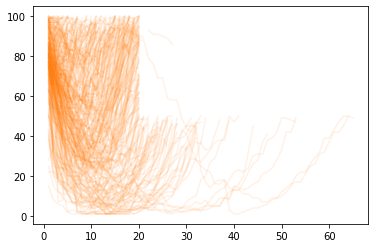

In [40]:
for index, row in billboard.iterrows():
    pp.plot(range(1,77), billboard.loc[index, 'x1st.week':'x76th.week'], color = 'C1', alpha = 0.1)
    

In [44]:
bshort = billboard[['artist.inverted', 'track', 'time', 'genre', 'date.entered','x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week']]
bshort

,artist.inverted,track,time,genre,date.entered,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,78,63.0,49.0,33.0,23.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,15,8.0,6.0,5.0,2.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,71,48.0,43.0,31.0,20.0
3,Madonna,Music,3:45,Rock,2000-08-12,41,23.0,18.0,14.0,2.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,57,47.0,45.0,29.0,23.0
...,...,...,...,...,...,...,...,...,...,...
312,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,98,NaN,NaN,NaN,NaN
313,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,99,99.0,99.0,99.0,NaN
314,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,99,99.0,NaN,NaN,NaN
315,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,99,99.0,NaN,NaN,NaN


In [46]:
bshort.columns = ['artist', 'track', 'time', 'genre', 'date.entered','wk1', 'wk2', 'wk3', 'wk4', 'wk5']

,artist,track,time,genre,date.entered,wk1,wk2,wk3,wk4,wk5
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,78,63.0,49.0,33.0,23.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,15,8.0,6.0,5.0,2.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,71,48.0,43.0,31.0,20.0
3,Madonna,Music,3:45,Rock,2000-08-12,41,23.0,18.0,14.0,2.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,57,47.0,45.0,29.0,23.0
...,...,...,...,...,...,...,...,...,...,...
312,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,98,NaN,NaN,NaN,NaN
313,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,99,99.0,99.0,99.0,NaN
314,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,99,99.0,NaN,NaN,NaN
315,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,99,99.0,NaN,NaN,NaN


In [186]:
bmelt = pd.melt(bshort, id_vars=['artist', 'track', 'time', 'genre', 'date.entered'],
                value_vars=['wk1', 'wk2', 'wk3', 'wk4', 'wk5'],
                var_name='Week', value_name='Rank')

In [187]:
bshort[bshort['artist'] == 'Santana']

,artist,track,time,genre,date.entered,wk1,wk2,wk3,wk4,wk5
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,15,8.0,6.0,5.0,2.0


,artist,track,time,genre,date.entered,Week,Rank
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,wk1,15.0
318,Santana,"Maria, Maria",4:18,Rock,2000-02-12,wk2,8.0
635,Santana,"Maria, Maria",4:18,Rock,2000-02-12,wk3,6.0
952,Santana,"Maria, Maria",4:18,Rock,2000-02-12,wk4,5.0
1269,Santana,"Maria, Maria",4:18,Rock,2000-02-12,wk5,2.0


In [188]:
bmelt['Week'] = bmelt['Week'].apply(lambda s: int(s[2]))

In [189]:
bmelt['date.entered'] = pd.to_datetime(bmelt['date.entered'])

,artist,track,time,genre,date.entered,Week,Rank
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,1,15.0
318,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2,8.0
635,Santana,"Maria, Maria",4:18,Rock,2000-02-12,3,6.0
952,Santana,"Maria, Maria",4:18,Rock,2000-02-12,4,5.0
1269,Santana,"Maria, Maria",4:18,Rock,2000-02-12,5,2.0


In [190]:
bmelt['date'] = bmelt['date.entered'] + pd.Timedelta('7 days') * (bmelt['Week']- 1)
bmelt = bmelt.drop(['date.entered'], axis = 1)
bmelt

,artist,track,time,genre,Week,Rank,date
0,Destiny's Child,Independent Women Part I,3:38,Rock,1,78.0,2000-09-23
1,Santana,"Maria, Maria",4:18,Rock,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,4:07,Rock,1,71.0,1999-10-23
3,Madonna,Music,3:45,Rock,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,1,57.0,2000-08-05
...,...,...,...,...,...,...,...
1580,Ghostface Killah,Cherchez LaGhost,3:04,R&B,5,NaN,2000-09-02
1581,"Smith, Will",Freakin' It,3:58,Rap,5,NaN,2000-03-11
1582,Zombie Nation,Kernkraft 400,3:30,Rock,5,NaN,2000-09-30
1583,"Eastsidaz, The",Got Beef,3:58,Rap,5,NaN,2000-07-29


In [191]:
bmelt[bmelt['artist'] == 'Santana']

,artist,track,time,genre,Week,Rank,date
1,Santana,"Maria, Maria",4:18,Rock,1,15.0,2000-02-12
318,Santana,"Maria, Maria",4:18,Rock,2,8.0,2000-02-19
635,Santana,"Maria, Maria",4:18,Rock,3,6.0,2000-02-26
952,Santana,"Maria, Maria",4:18,Rock,4,5.0,2000-03-04
1269,Santana,"Maria, Maria",4:18,Rock,5,2.0,2000-03-11


In [192]:
bfinal = bmelt[['artist', 'track', 'time', 'date', 'Week', 'Rank']]

In [193]:
bfinal[bfinal['artist'] == 'Santana']

,artist,track,time,date,Week,Rank
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0
318,Santana,"Maria, Maria",4:18,2000-02-19,2,8.0
635,Santana,"Maria, Maria",4:18,2000-02-26,3,6.0
952,Santana,"Maria, Maria",4:18,2000-03-04,4,5.0
1269,Santana,"Maria, Maria",4:18,2000-03-11,5,2.0


In [194]:
bfinal.sort_values(['artist', 'track', 'time'], inplace= True)


<ipython-input-194-0e534396b5b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bfinal.sort_values(['artist', 'track', 'time'], inplace= True)


In [195]:
bfinal

,artist,track,time,date,Week,Rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
1197,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-18,4,77.0
1514,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-25,5,87.0
...,...,...,...,...,...,...
15,matchbox twenty,Bent,4:12,2000-04-29,1,60.0
332,matchbox twenty,Bent,4:12,2000-05-06,2,37.0
649,matchbox twenty,Bent,4:12,2000-05-13,3,29.0
966,matchbox twenty,Bent,4:12,2000-05-20,4,24.0


In [196]:
tracks = bfinal[['artist', 'track', 'time']].drop_duplicates()
tracks.index.name = 'id'
tracks = tracks.reset_index()

In [197]:
tracks[tracks['id'] == 246]

,id,artist,track,time
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22


In [198]:
merged = pd.merge (tracks, bfinal[['track', 'artist', 'time', 'date', 'Week', 'Rank']], on = ['track', 'artist', 'time'])

In [199]:
merged = merged.drop(['artist', 'track', 'time'], axis = 1)

In [219]:
merged.loc[merged[merged['Week'] == 1]['Rank'].idxmax()]

id                      248
date    2000-02-12 00:00:00
Week                      1
Rank                  100.0
Name: 430, dtype: object

In [220]:
tracks[tracks['id'] == 248]

,id,artist,track,time
86,248,Drama,"Left, Right, Left",3:37
